In [342]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,KFold
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

ImportError: cannot import name 'GradientBoostingRegressor'

In [322]:
train= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/train.csv')
test= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/test.csv')

In [323]:
print(train.shape)

train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<100000)].index, inplace=True)
train.drop(train[(train['TotalBsmtSF']>6000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['1stFlrSF']>4500) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['MasVnrArea']>1400) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['BsmtFinSF1']>5000) & (train['SalePrice']<200000)].index, inplace=True)
train.drop(train[(train['LotFrontage']>300) & (train['SalePrice']<300000)].index, inplace=True)
train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<100000)].index, inplace=True)
train.drop(train[(train['BedroomAbvGr']>7) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

print(train.shape)

(1460, 81)
(1452, 81)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


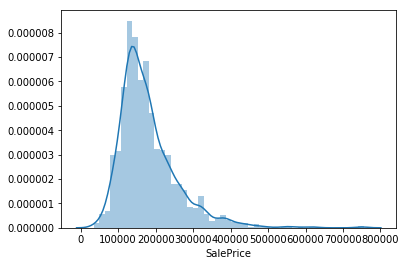

<Figure size 432x288 with 0 Axes>

In [7]:
sns.distplot(train.SalePrice)
fig = plt.figure(figsize=[6,4])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


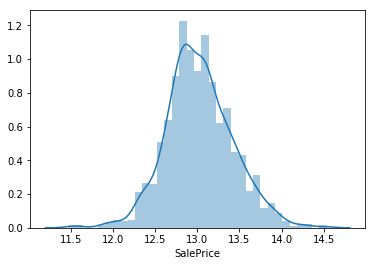

In [9]:
sns.distplot(np.log(train.SalePrice)+1)

In [4]:
data= pd.concat([train.drop(['SalePrice'], axis=1), test])

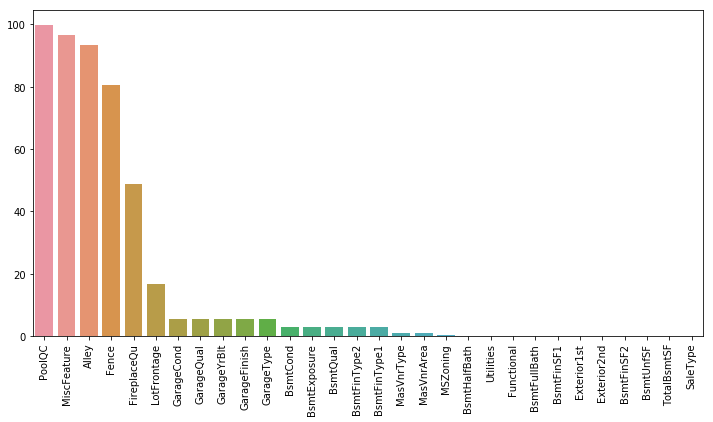

In [420]:
xx= (data.isnull().sum())/len(data)*100
xx=xx.sort_values(ascending=False).head(30)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(xx.keys(), xx)

In [5]:
total=data.isnull().sum().sort_values(ascending=False)
percent=((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing= pd.concat([total,percent], axis=1, join='outer', keys=['Total missing count', 'Percentage '])
missing.head(35)

,Total missing count,Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


## Data Cleaning

In [324]:
test.loc[960, 'PoolQC']='Fa'
test.loc[1043, 'PoolQC']='Gd'
test.loc[1139, 'PoolQC']='Fa'
train['PoolQC'].fillna('None', inplace=True)
test['PoolQC'].fillna('None', inplace=True)
#test[test['Id']==2550]['MiscFeature']
#test.loc[1089, 'MiscFeature']='Gar2'
#train['MiscFeature'].fillna('None', inplace=True)
#test['MiscFeature'].fillna('None', inplace=True)
train['FireplaceQu'].fillna('None', inplace=True)
test['FireplaceQu'].fillna('None', inplace=True)
train['LotFrontage'].fillna(70, inplace=True)
test['LotFrontage'].fillna(68, inplace=True)
train['GarageQual'].fillna('None', inplace=True)
test['GarageQual'].fillna('None', inplace=True)
train['GarageFinish'].fillna('None', inplace=True)
test['GarageFinish'].fillna('None', inplace=True)
train['GarageYrBlt'].fillna('None', inplace=True)
test['GarageYrBlt'].fillna('None', inplace=True)
train['GarageType'].fillna('None', inplace=True)
test['GarageType'].fillna('None', inplace=True)
train['GarageCond'].fillna('None', inplace=True)
test['GarageCond'].fillna('None', inplace=True)
test.loc[test['Id']==2577, 'GarageType']='None'
test.loc[test['Id']==2041, 'BsmtCond']='Gd'
test.loc[test['Id']==2186, 'BsmtCond']='TA'
test.loc[test['Id']==2525, 'BsmtCond']='TA'
train['BsmtCond'].fillna('None', inplace=True)
test['BsmtCond'].fillna('None', inplace=True)
train['BsmtExposure'].fillna('None', inplace=True)
test['BsmtExposure'].fillna('None', inplace=True)
test.loc[test['Id']==2218, 'BsmtQual']='Fa'
test.loc[test['Id']==2219, 'BsmtQual']='TA'
train['BsmtQual'].fillna('None', inplace=True)
test['BsmtQual'].fillna('None', inplace=True)
train.loc[train['Id']==333, 'BsmtFinType2']='Unf'
train['BsmtFinType2'].fillna('None', inplace=True)
test['BsmtFinType2'].fillna('None', inplace=True)
train['BsmtFinType1'].fillna('None', inplace=True)
test['BsmtFinType1'].fillna('None', inplace=True)
test['BsmtHalfBath'].fillna(0, inplace=True)
test['BsmtFullBath'].fillna(0, inplace=True)
test['BsmtFinSF1'].fillna(0, inplace=True)
test['BsmtFinSF2'].fillna(0, inplace=True)
test['BsmtUnfSF'].fillna(0, inplace=True)
test['TotalBsmtSF'].fillna(0, inplace=True)
train['MasVnrType'].fillna('None', inplace=True)
test['MasVnrType'].fillna('None', inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)
test['MSZoning'].fillna('RL', inplace=True)

#test['Utilities'].fillna('AllPub', inplace=True)

test['GarageCars'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)

#train['Fence'].fillna('None', inplace=True)
#test['Fence'].fillna('None', inplace=True)
#train['Alley'].fillna('None', inplace=True)
#test['Alley'].fillna('None', inplace=True)

test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)
train['Electrical'].fillna('SBrkr', inplace=True)

In [325]:
train.drop(['Alley','Fence', 'Utilities', 'MiscFeature', 'Electrical', 'CentralAir','KitchenAbvGr','BsmtHalfBath','MiscVal'], axis=1, inplace=True)
test.drop(['Alley','Fence', 'Utilities', 'MiscFeature','Electrical', 'CentralAir','KitchenAbvGr','BsmtHalfBath','MiscVal'], axis=1, inplace=True)

In [326]:
print(train.isnull().sum().sort_values(ascending=False).head(5))
print(test.isnull().sum().sort_values(ascending=False).head(5))

SalePrice        0
SaleCondition    0
RoofStyle        0
RoofMatl         0
Exterior1st      0
dtype: int64
SaleCondition    0
ExterQual        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
dtype: int64


In [283]:
train.shape, test.shape

((1452, 72), (1459, 71))

In [327]:
train_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[: train.shape[0]]
test_dummies = pd.get_dummies(pd.concat((train.drop(["SalePrice", "Id"], axis=1), test.drop(["Id"], axis=1)), axis=0)).iloc[train.shape[0]:]

In [234]:
train_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [329]:
n=[]
for i in train:
    
    if(train[i].dtypes!='object'):
        n.append(i)

In [330]:
n=n[1:-1]

In [331]:
train_dummies[n]=np.log(train_dummies[n]+1)
test_dummies[n]=np.log(test_dummies[n]+1)

In [332]:
train_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0


In [333]:
squares=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
        'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch']

for i in squares:
    ii=i+'_sq'
    train_dummies[ii]= train_dummies[i]**train_dummies[i]
    test_dummies[ii]= test_dummies[i]**test_dummies[i]

In [334]:
train_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,LotFrontage_sq,WoodDeckSF_sq,2ndFlrSF_sq,OpenPorchSF_sq,HalfBath_sq,LotArea_sq,BsmtFullBath_sq,BsmtUnfSF_sq,BedroomAbvGr_sq,ScreenPorch_sq
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,404.307683,1.000000,397367.477886,347.427786,0.775655,4.431996e+08,0.775655,3269.230936,1.572727,1.0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,668.668539,20371.106172,1.000000,1.000000,1.000000,6.674206e+08,1.000000,17865.986015,1.572727,1.0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,450.584369,1.000000,413819.509812,145.853843,0.775655,1.112975e+09,0.775655,57605.649793,1.572727,1.0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,334.045678,1.000000,279148.356440,96.912394,1.000000,6.563082e+08,0.775655,106593.015030,1.572727,1.0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,753.786813,6244.436233,732831.836280,753.786813,0.775655,2.402445e+09,0.775655,80996.635381,2.150945,1.0


In [335]:
test_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,LotFrontage_sq,WoodDeckSF_sq,2ndFlrSF_sq,OpenPorchSF_sq,HalfBath_sq,LotArea_sq,BsmtFullBath_sq,BsmtUnfSF_sq,BedroomAbvGr_sq,ScreenPorch_sq
0,3.044522,4.394449,9.360741,1.791759,1.945910,7.581720,7.581720,0.000000,6.150603,4.976734,...,668.668539,2734.612803,1.000000,1.000000,1.000000,1.236470e+09,1.0,15572.509121,1.108849,1841.886838
1,3.044522,4.406719,9.565775,1.945910,1.945910,7.580189,7.580189,4.691348,6.828712,0.000000,...,689.343450,43677.173996,1.000000,103.160025,0.775655,2.406289e+09,1.0,47818.485937,1.572727,1.000000
2,4.110874,4.317488,9.534668,1.791759,1.791759,7.599902,7.600402,0.000000,6.674561,0.000000,...,552.844435,8125.062728,224543.191051,90.902890,0.775655,2.174469e+09,1.0,2586.069303,1.572727,1.000000
3,4.110874,4.369448,9.208238,1.945910,1.945910,7.600402,7.600402,3.044522,6.401917,0.000000,...,628.507493,34247.410135,204018.636574,103.160025,0.775655,7.557310e+08,1.0,25616.466534,1.572727,1.000000
4,4.795791,3.784190,8.518392,2.197225,1.791759,7.597396,7.597396,0.000000,5.575949,0.000000,...,153.871797,1.000000,1.000000,710.419185,1.000000,8.416888e+07,1.0,661706.922658,1.108849,2941.079364


## Modeling

In [336]:
y=np.asarray(train['SalePrice'])
y=np.log(y+1)
print(y[:5])
x=np.asarray(train_dummies)
x.shape,y.shape

((1452, 402), (1452,))

In [338]:
kf = KFold(n_splits=5,random_state=None, shuffle=False)

train_rr=[]
test_rr=[]
train_gbr=[]
test_gbr=[]
train_xgbr=[]
test_xgbr=[]
train_lsr=[]
test_lsr=[]
rr_mse, gbr_mse, xgbr_mse, lsr_mse=[],[],[],[]

RR= Ridge(alpha=6)
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=300)
xgbr = XGBRegressor(max_depth=5, n_estimators=300)
lsr = Lasso(alpha=0.00057)

for train_index, test_index in kf.split(x):
    
        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        
        RR.fit(xtrain, ytrain)
        predict_rr= RR.predict(xtrain)
        predict_rr_= RR.predict(xtest)
        
        train_rr.append(r2_score(predict_rr, ytrain))
        test_rr.append(r2_score(predict_rr_, ytest))
        rr_mse.append(mean_squared_error(ytest,predict_rr_))
        
        gbr.fit(xtrain, ytrain)
        predict_gbr= gbr.predict(xtrain)
        predict_gbr_= gbr.predict(xtest)
        
        train_gbr.append(r2_score(predict_gbr, ytrain))
        test_gbr.append(r2_score(predict_gbr_, ytest))
        gbr_mse.append(mean_squared_error(ytest,predict_gbr_))
        
        xgbr.fit(xtrain, ytrain)
        predict_xgbr= xgbr.predict(xtrain)
        predict_xgbr_= xgbr.predict(xtest)
        
        train_xgbr.append(r2_score(predict_xgbr, ytrain))
        test_xgbr.append(r2_score(predict_xgbr_, ytest))
        xgbr_mse.append(mean_squared_error(ytest,predict_xgbr_))
        
        lsr.fit(xtrain, ytrain)
        predict_lsr= lsr.predict(xtrain)
        predict_lsr_= lsr.predict(xtest)
        
        train_lsr.append(r2_score(predict_lsr, ytrain))
        test_lsr.append(r2_score(predict_lsr_, ytest))
        lsr_mse.append(mean_squared_error(ytest,predict_lsr_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.309359e-27
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.752393e-26
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alph

In [271]:
print("Ridge: ",np.asarray(test_rr).mean())
print("GradientBoosting: ",np.asarray(test_gbr).mean())
print("XGBRegressor: ",np.asarray(test_xgbr).mean())
print("Lasso: ", np.asarray(test_lsr).mean())

Ridge:  0.9127684761156244
GradientBoosting:  0.8886052634608124
XGBRegressor:  0.8959512615756198
Lasso:  0.917513547581161


In [272]:
print(np.asarray(rr_mse).mean())
print(np.asarray(gbr_mse).mean())
print(np.asarray(xgbr_mse).mean())
print(np.asarray(lsr_mse).mean())

0.012761441749521272
0.015326250392685096
0.014443103633761787
0.01198341090302607


## Stacking

In [313]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3, random_state=4)

lsr.fit(xtrain,ytrain)
gbr.fit(xtrain,ytrain)
xgbr.fit(xtrain,ytrain)
RR.fit(xtrain,ytrain)
pred1_=lsr.predict(xtrain)
pred2_=gbr.predict(xtrain)
pred3_=xgbr.predict(xtrain)
pred4_=RR.predict(xtrain)
pred1=lsr.predict(xtest)
pred2=gbr.predict(xtest)
pred3=xgbr.predict(xtest)
pred4=RR.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.393016e-17
  overwrite_a=True).T


In [315]:
concat_= pd.concat([pd.DataFrame(pred1_),pd.DataFrame(pred2_),pd.DataFrame(pred3_),pd.DataFrame(pred4_)], axis=1)
concat= pd.concat([pd.DataFrame(pred1),pd.DataFrame(pred2),pd.DataFrame(pred3),pd.DataFrame(pred4)], axis=1)

In [316]:
xx_=np.asarray(concat_)
xx=np.asarray(concat)

In [317]:
lsr_ = Lasso(alpha=0.00057)
lsr_.fit(concat_,ytrain)

Lasso(alpha=0.00057, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [319]:
a=lsr_.predict(xx_)
b=lsr_.predict(xx)

In [ ]:
r2_score(ytrain,a), r2_score(ytest,b)

## Predictions

In [303]:
xxx=np.asarray(test_dummies)

In [410]:
#stacking
#p1=gbr.predict(xxx)
#p2=xgbr.predict(xxx)
#p3=lsr.predict(xxx)
#p4=RR.predict(xxx)
#m= pd.concat([pd.DataFrame(p1),pd.DataFrame(p2),pd.DataFrame(p3),pd.DataFrame(p4)], axis=1)
#predict= myLGB.predict(m)

In [304]:
predict= lsr.predict(xxx)
predict

array([11.71740865, 11.97531467, 12.11883742, ..., 12.05153314,
       11.71196876, 12.32763692])

In [306]:
idd= np.asarray(test['Id'])
price= np.exp(predict)-1
price

array([122688.08297742, 158785.31839062, 183291.29900597, ...,
       171360.92870203, 122022.47988784, 225851.38856612])

In [309]:
dff= pd.DataFrame({'Id':idd, 'SalePrice':price})
dff.to_csv("submit.csv", index=False)